In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
df = df.drop(['sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], axis=1)

<Axes: xlabel='survived', ylabel='count'>

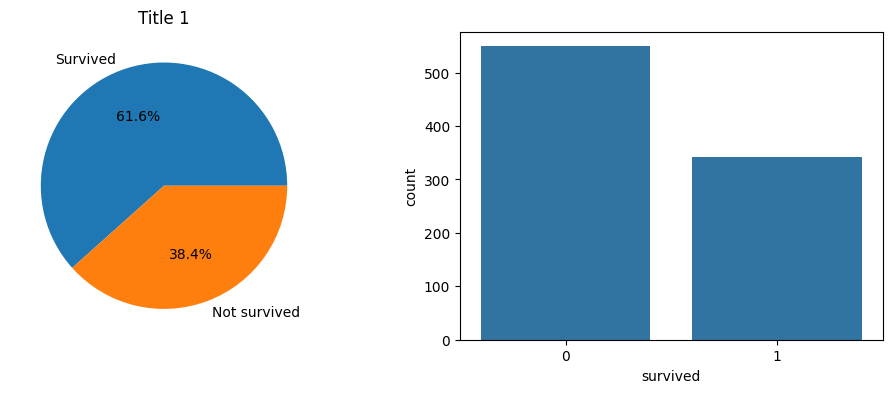

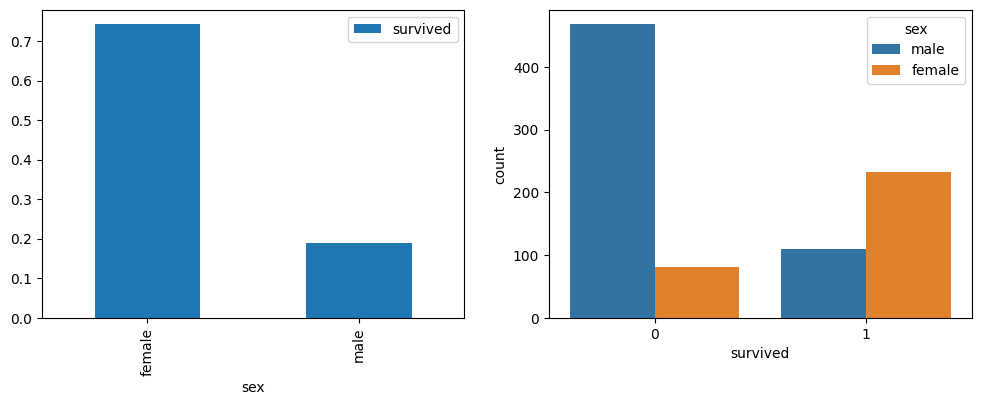

In [4]:
fg, ax = plt.subplots(1,2,figsize=(12,4))
df['survived'].value_counts().plot.pie(ax=ax[0], autopct='%1.1f%%', labels=['Survived', 'Not survived'])
sns.countplot(data=df, x='survived')
ax[0].set_title('Title 1')
ax[0].set_ylabel('')


fg1, ax1 = plt.subplots(1,2,figsize=(12,4))
df[['sex', 'survived']].groupby('sex').mean().plot.bar(ax=ax1[0])
sns.countplot(data=df, x='survived', hue='sex')


In [5]:
df['sex'] = df['sex'].astype(pd.api.types.CategoricalDtype())

In [6]:
df.dtypes

survived       int64
pclass         int64
sex         category
age          float64
dtype: object

In [7]:
ageNull = np.round(df['age'].mean())
df['age'] = df['age'].fillna(ageNull)

In [8]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Senior' ]
labels_num = [1, 2, 3, 4, 5, 6, 7, 8]
df['ageGrp'] = pd.cut(df['age'], bins=bins, labels=labels_num)

In [9]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

In [10]:
df = df.drop('age', axis=1)

In [11]:
df

,survived,pclass,sex,ageGrp
0,0,3,1,5
1,1,1,0,7
2,1,3,0,6
3,1,1,0,6
4,0,3,1,6
...,...,...,...,...
886,0,2,1,6
887,1,1,0,5
888,0,3,0,6
889,1,1,1,6


<Axes: >

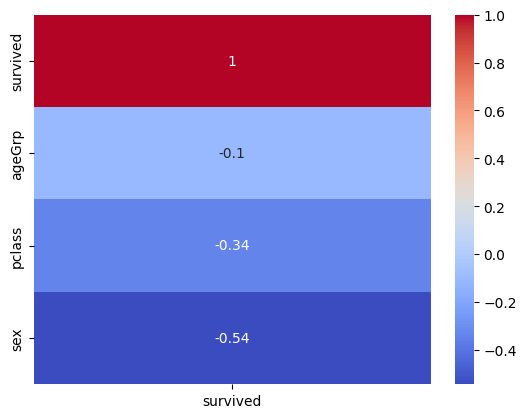

In [ ]:
#sns.heatmap(data=df.corr()[['survived']].sort_values('survived', ascending=False), annot=True, cmap='coolwarm')
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

In [13]:
X = df.loc[:, ['pclass','sex','ageGrp']]
y_true = df['survived']

In [14]:
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [15]:
classifier = tree.DecisionTreeClassifier(max_depth=3) 
#gini: 1- p^2(yes) - p^2(no)
# entropy: - (yes/total) * log2(yes/total) - (no/total)*log2(no/total)
# log_loss: giong entropy nhung log2 thay bang ln (loge)
classifier.fit(X, y_true)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


1. Accuracy 

In [16]:
classifier.score(X,y_true)

0.8103254769921436

In [17]:
y_pred = classifier.predict(X=X)
accuracy = accuracy_score(y_true=y_true, y_pred=y_pred)
accuracy

0.8103254769921436

2. Precision

In [18]:
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
print(precision)

#recall
print(recall)
print(f1)

0.7781350482315113
0.7076023391812866
0.7411944869831547


In [19]:
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, target_names=['no','yes']))

[[480  69]
 [100 242]]
              precision    recall  f1-score   support

          no       0.83      0.87      0.85       549
         yes       0.78      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



In [20]:
from sklearn.model_selection import KFold


kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(estimator=classifier, X=X, y=y_true, cv=5, scoring='accuracy')
#scores = cross_val_score(estimator=classifier, X=X, y=y_true, cv=kf, scoring='accuracy')
print(scores)
print(scores.mean())

[0.75418994 0.79213483 0.80337079 0.76966292 0.79775281]
0.783422258489737


In [21]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y_true, train_size=.8, random_state=42)

In [22]:
result = pd.DataFrame({'real': y_true, 'predict': y_pred})
result

,real,predict
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
886,0,0
887,1,1
888,0,1
889,1,0


In [23]:
print(tree.export_text(classifier,feature_names=['pclass','sex','ageGrp']))

|--- sex <= 0.50
|   |--- pclass <= 2.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 1
|   |   |--- pclass >  1.50
|   |   |   |--- class: 1
|   |--- pclass >  2.50
|   |   |--- ageGrp <= 6.50
|   |   |   |--- class: 1
|   |   |--- ageGrp >  6.50
|   |   |   |--- class: 0
|--- sex >  0.50
|   |--- ageGrp <= 3.50
|   |   |--- pclass <= 2.50
|   |   |   |--- class: 1
|   |   |--- pclass >  2.50
|   |   |   |--- class: 0
|   |--- ageGrp >  3.50
|   |   |--- pclass <= 1.50
|   |   |   |--- class: 0
|   |   |--- pclass >  1.50
|   |   |   |--- class: 0



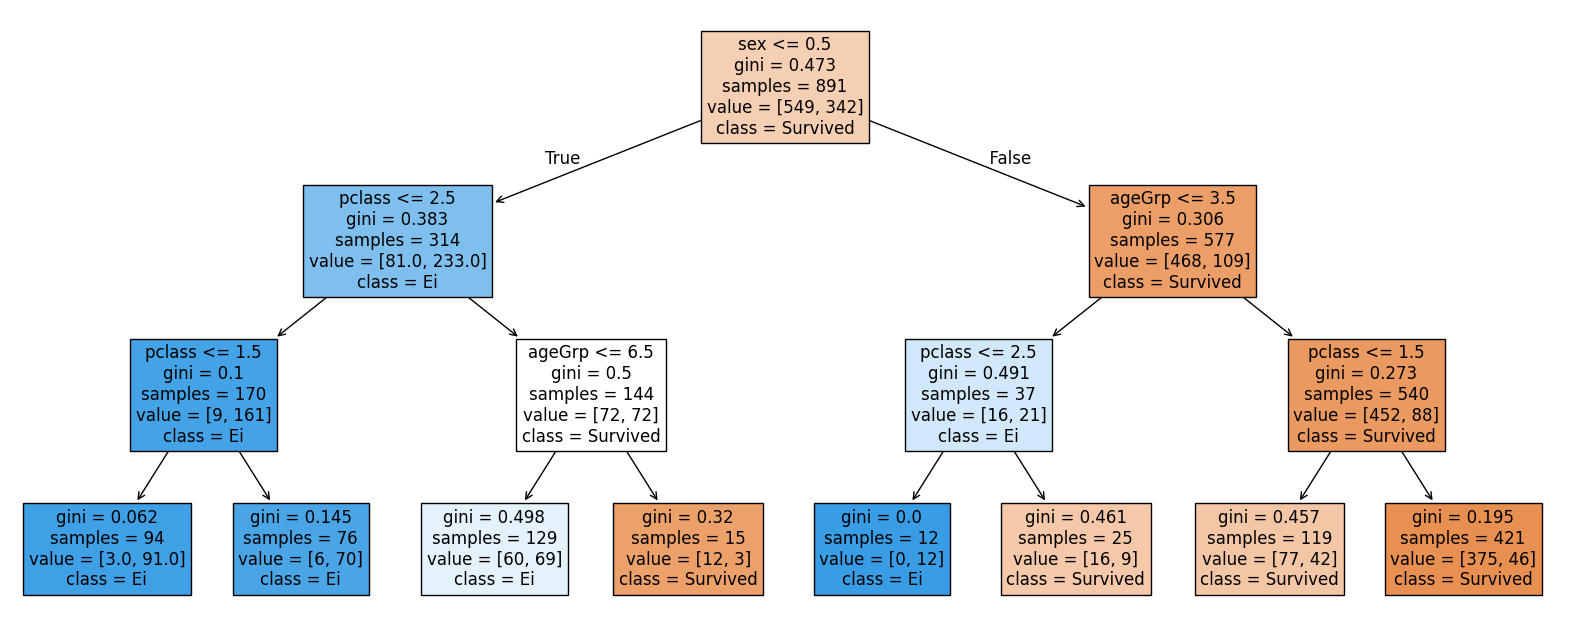

In [24]:
plt.figure(figsize=(20,8))
tree.plot_tree(classifier,feature_names=['pclass','sex','ageGrp'], fontsize=12, filled=True, class_names=['Survived', 'Ei'])
plt.show()

PART 2.2. Logistic Regression


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [26]:
X

,pclass,sex,ageGrp
0,3,1,5
1,1,0,7
2,3,0,6
3,1,0,6
4,3,1,6
...,...,...,...
886,2,1,6
887,1,0,5
888,3,0,6
889,1,1,6


In [27]:
model = LogisticRegression(solver='liblinear')
model.fit(X=X, y=y_true)
# penalty: để tránh overfiting: l2 (ridge: sườn núi) làm giảm độ lớn của các wi, nhưng ko triệt tiêu wi nào như l1 (lasso: dây treo cổ)
# C: Hệ số điều chỉnh mức độ regularization: C nhỏ -> điều chỉnh mạnh và ngc lại
# tol: tolerance, ngưỡng sai số chấp nhận đc: nếu sự thay đổi của hàm mất mát nhỏ hơn tol -> coi như đã hội tụ
# max_iter: số lần lặp tối đa để model hội tụ (nếu quá mà chưa hội tụ -> warning)
 

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [28]:
y_pred = model.predict(X=X)

In [29]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [35]:
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

0.7890011223344556
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.69      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.77       891
weighted avg       0.79      0.79      0.79       891



In [ ]:
0.8103254769921436
0.83      0.87      0.85       549
0.78      0.71      0.74       342


,pclass,sex,ageGrp
0,3,1,5
1,1,0,7
2,3,0,6
3,1,0,6
4,3,1,6
...,...,...,...
886,2,1,6
887,1,0,5
888,3,0,6
889,1,1,6


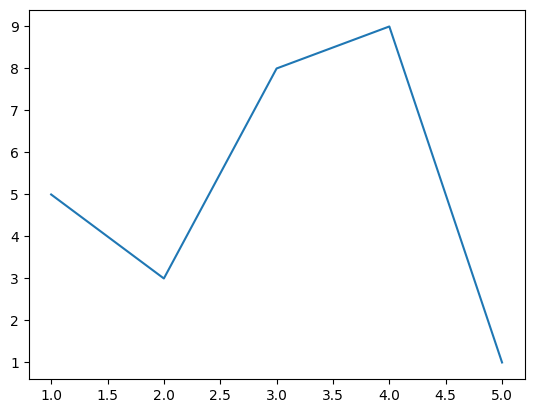

In [36]:
plt.plot([1,2,3,4,5], [5,3, 8,9,1])